In [23]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import augly.image as imaugs
from PIL import Image
from tqdm import tqdm
from augly.image.composition import Compose

In [ ]:
cat_dir = "cats"
dog_dir = "dogs"
combined_dir = "original_dataset"

if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

data = []
labels = []

for img in os.listdir(cat_dir):
    data.append(os.path.join(cat_dir, img))
    labels.append(0)  # 0 for cat

for img in os.listdir(dog_dir):
    data.append(os.path.join(dog_dir, img))
    labels.append(1)  # 1 for dog

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

def copy_images(file_list, label_list, target_folder):
    for file, label in zip(file_list, label_list):
        label_folder = os.path.join(target_folder, str(label))  
        os.makedirs(label_folder, exist_ok=True)
        shutil.copy(file, label_folder)

train_folder = os.path.join(combined_dir, "train")
test_folder = os.path.join(combined_dir, "test")

copy_images(train_data, train_labels, train_folder)
copy_images(test_data, test_labels, test_folder)

print("Dataset successfully prepared with train-test split!")

Dataset successfully prepared with train-test split!


In [ ]:
cat_dir = "cats"
dog_dir = "dogs"
combined_dir = "dataset"

if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

data = []
labels = []

for img in os.listdir(cat_dir):
    data.append(os.path.join(cat_dir, img))
    labels.append(0)  # 0 for cat

for img in os.listdir(dog_dir):
    data.append(os.path.join(dog_dir, img))
    labels.append(1)  # 1 for dog

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

def copy_images(file_list, label_list, target_folder):
    for file, label in zip(file_list, label_list):
        label_folder = os.path.join(target_folder, str(label))  
        os.makedirs(label_folder, exist_ok=True)
        shutil.copy(file, label_folder)

train_folder = os.path.join(combined_dir, "train")
test_folder = os.path.join(combined_dir, "test")

copy_images(train_data, train_labels, train_folder)
copy_images(test_data, test_labels, test_folder)

print("Dataset successfully prepared with train-test split!")

Dataset successfully prepared with train-test split!


In [ ]:
import numpy as np
np.float = float
import os
import random
from PIL import Image
import augly.image.functional as imf

train_dir = "dataset/train"
labels = ["0", "1"]

def apply_random_augmentations(img):
    """Applies 3 random augmentations (with different transformations) to an image."""
    augmentations = [
        lambda img: imf.crop(img, 
                             x1=random.uniform(0, 0.2),
                             y1=random.uniform(0, 0.2),
                             x2=random.uniform(0.8, 1.0),
                             y2=random.uniform(0.8, 1.0)),
        
        lambda img: imf.color_jitter(img,
                                     brightness_factor=random.uniform(0.8, 1.2),
                                     contrast_factor=random.uniform(0.8, 1.2),
                                     saturation_factor=random.uniform(0.8, 1.2)),
        
        lambda img: imf.grayscale(img),
        
        lambda img: imf.opacity(img, level=random.uniform(0.7, 1.0)),
        
        lambda img: imf.blur(img, radius=random.uniform(1, 3)),
        
        lambda img: imf.rotate(img, degrees=random.uniform(-30, 30)),
        
        lambda img: imf.perspective_transform(img, sigma=random.uniform(20, 40)),
        
        lambda img: imf.brightness(img, factor=random.uniform(0.8, 1.2)),
        
        lambda img: imf.hflip(img),  # Horizontal Flip
        
        lambda img: imf.vflip(img)   # Vertical Flip
    ]
    
    selected_augs = random.sample(augmentations, 3)
    
    for aug in selected_augs:
        img = aug(img)
    
    return img

for label in labels:
    img_folder = os.path.join(train_dir, label)
    augmented_count = 0
    
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        
        try:
            img = Image.open(img_path).convert("RGB")
            
            for i in range(2):
                aug_img = apply_random_augmentations(img)
                aug_img_name = f"aug_{augmented_count}_{i}.jpg"
                aug_img_path = os.path.join(img_folder, aug_img_name)
                
                aug_img.save(aug_img_path)
                augmented_count += 1

        except Exception as e:
            print(f"Error processing {img_name}: {e}")

print("Data augmentation completed successfully!")


Data augmentation completed successfully!


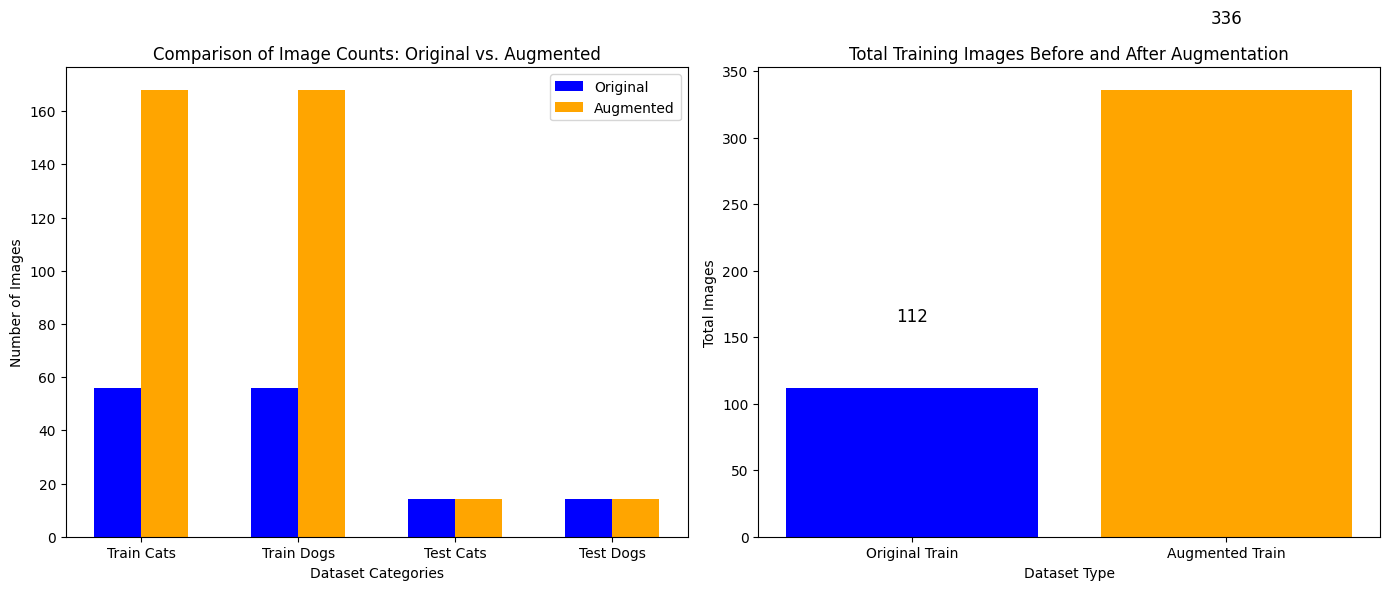

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

def count_images(directory):
    counts = {}
    for label in ["0", "1"]: 
        label_dir = os.path.join(directory, label)
        if os.path.exists(label_dir):
            counts[label] = len(os.listdir(label_dir))
        else:
            counts[label] = 0 
    return counts

original_train_dir = "original_dataset/train"
original_test_dir = "original_dataset/test"
augmented_train_dir = "dataset/train"
augmented_test_dir = "dataset/test"

original_train_counts = count_images(original_train_dir)
original_test_counts = count_images(original_test_dir)
augmented_train_counts = count_images(augmented_train_dir)
augmented_test_counts = count_images(augmented_test_dir)

labels = ["Train Cats", "Train Dogs", "Test Cats", "Test Dogs"]
original_counts = [
    original_train_counts["0"], original_train_counts["1"],
    original_test_counts["0"], original_test_counts["1"]
]
augmented_counts = [
    augmented_train_counts["0"], augmented_train_counts["1"],
    augmented_test_counts["0"], augmented_test_counts["1"]
]

x = np.arange(len(labels))  
width = 0.3  

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(x - width/2, original_counts, width, label="Original", color="blue")
axes[0].bar(x + width/2, augmented_counts, width, label="Augmented", color="orange")
axes[0].set_xlabel("Dataset Categories")
axes[0].set_ylabel("Number of Images")
axes[0].set_title("Comparison of Image Counts: Original vs. Augmented")
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].legend()

total_original_train = original_train_counts["0"] + original_train_counts["1"]
total_augmented_train = augmented_train_counts["0"] + augmented_train_counts["1"]

axes[1].bar(["Original Train", "Augmented Train"], [total_original_train, total_augmented_train], color=["blue", "orange"])
axes[1].set_xlabel("Dataset Type")
axes[1].set_ylabel("Total Images")
axes[1].set_title("Total Training Images Before and After Augmentation")

for i, v in enumerate([total_original_train, total_augmented_train]):
    axes[1].text(i, v + 50, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [7]:
transform = transforms.Compose([
    transforms.Resize((228, 228)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

without_aug_loss = []

train_dataset = datasets.ImageFolder(root='original_dataset/train', transform=transform)
test_dataset = datasets.ImageFolder(root='original_dataset/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.resnet50(weights=None)  
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  

def train_model(model, train_loader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")
        without_aug_loss.append(running_loss/len(train_loader))

print("Training model...")
train_model(model, train_loader)

def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    
    accuracy_without_aug = accuracy_score(all_labels, all_preds)
    precision_without_aug = precision_score(all_labels, all_preds, average='macro')
    recall_without_aug = recall_score(all_labels, all_preds, average='macro')
    f1_without_aug = f1_score(all_labels, all_preds, average='macro')
    
    print("Model without data Augmentations")
    print(f"Accuracy: {accuracy_without_aug:.4f}, Precision: {precision_without_aug:.4f}, Recall: {recall_without_aug:.4f}, F1 Score: {f1_without_aug:.4f}")

print("Evaluating model...")
evaluate_model(model, test_loader)

Training model...
Epoch 1/10, Loss: 1.5317
Epoch 2/10, Loss: 0.9215
Epoch 3/10, Loss: 0.8026
Epoch 4/10, Loss: 0.6658
Epoch 5/10, Loss: 0.6465
Epoch 6/10, Loss: 0.5975
Epoch 7/10, Loss: 0.5869
Epoch 8/10, Loss: 0.4845
Epoch 9/10, Loss: 0.3792
Epoch 10/10, Loss: 0.5253
Evaluating model...
Model without data Augmentations
Accuracy: 0.5714, Precision: 0.7692, Recall: 0.5714, F1 Score: 0.4750


In [9]:
transform = transforms.Compose([
    transforms.Resize((228, 228)),
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance to flip image
    transforms.RandomRotation(15),  # Rotate by ±15 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])

with_aug_loss = []

train_dataset = datasets.ImageFolder(root='dataset/train', transform=transform)
test_dataset = datasets.ImageFolder(root='dataset/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.resnet50(weights=None) 
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  

def train_model(model, train_loader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")
        with_aug_loss.append(running_loss/len(train_loader))

print("Training model...")
train_model(model, train_loader)

def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    
    accuracy_with_aug = accuracy_score(all_labels, all_preds)
    precision_with_aug = precision_score(all_labels, all_preds, average='macro')
    recall_with_aug = recall_score(all_labels, all_preds, average='macro')
    f1_with_aug = f1_score(all_labels, all_preds, average='macro')
    
    print(f"Accuracy: {accuracy_with_aug:.4f}, Precision: {precision_with_aug:.4f}, Recall: {recall_with_aug:.4f}, F1 Score: {f1_with_aug:.4f}")

print("Evaluating model...")
evaluate_model(model, test_loader)

Training model...
Epoch 1/10, Loss: 1.3262
Epoch 2/10, Loss: 1.1362
Epoch 3/10, Loss: 0.7346
Epoch 4/10, Loss: 0.6595
Epoch 5/10, Loss: 0.6652
Epoch 6/10, Loss: 0.6507
Epoch 7/10, Loss: 0.6454
Epoch 8/10, Loss: 0.6067
Epoch 9/10, Loss: 0.5797
Epoch 10/10, Loss: 0.5923
Evaluating model...
Accuracy: 0.6786, Precision: 0.6795, Recall: 0.6786, F1 Score: 0.6782


In [10]:
import matplotlib.pyplot as plt

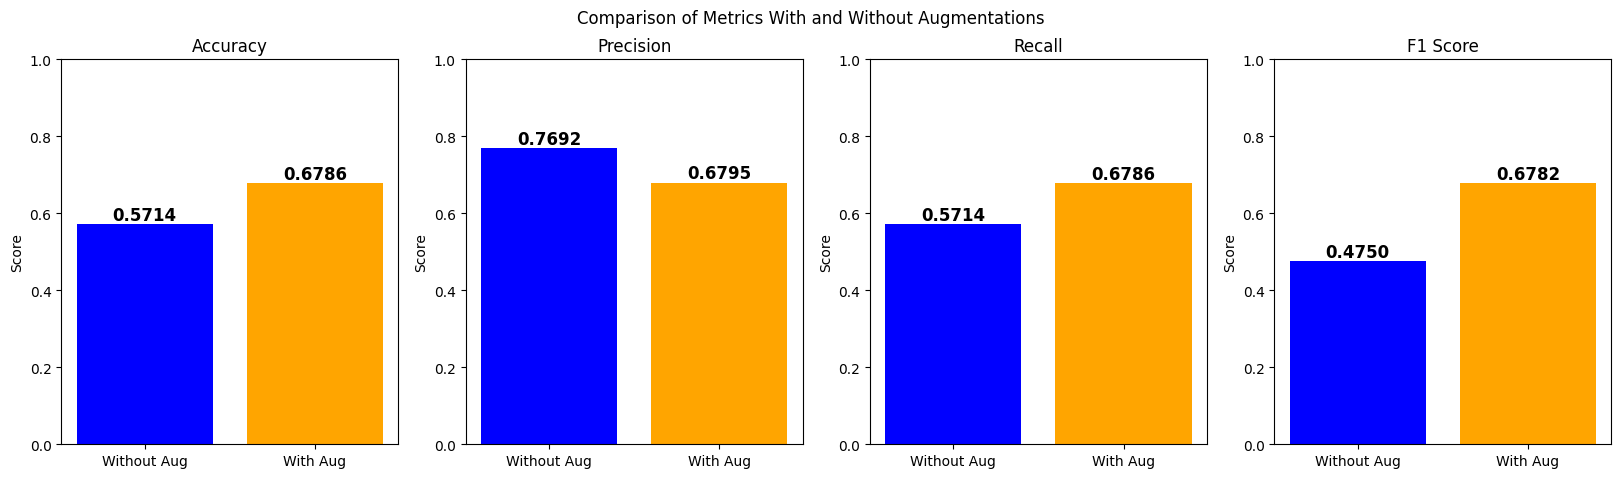

In [13]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_with_aug = [0.6786, 0.6795, 0.6786, 0.6782]
values_without_aug = [0.5714, 0.7692, 0.5714, 0.4750]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, metric in enumerate(metrics):
    bars = axs[i].bar(['Without Aug', 'With Aug'], [values_without_aug[i], values_with_aug[i]], color=['blue', 'orange'])

    for bar in bars:
        axs[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.4f}", 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

    axs[i].set_title(metric)
    axs[i].set_ylim(0, 1)  
    axs[i].set_ylabel('Score')

plt.suptitle('Comparison of Metrics With and Without Augmentations')
plt.show()
